## Car Price_Analysis

## Problem Statement
>**Buy a desairable car in affordable price**

>**Based on price,km-run,and ratings i gonna recommend to the which  model cars are best in Mercedes-Benz Brand.**

## contents
>1.Importing reqired libraries

>2.Scraping the data from "cars.com" website

>3.Cleaning the data

>4.Data visualization

In [1]:
# importing required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Note:The Beautiful Soup library in Python makes extracting HTML from web pages easy.

In [387]:
url="https://www.cars.com/shopping/results/?list_price_max=&makes[]=mercedes_benz&maximum_distance=500&models[]=mercedes_benz-s_class&page=1&page_size=100&stock_type=all&zip=46236%27"
page=requests.get(url)
page.status_code
html=page.text
soup=BeautifulSoup(html)   

In [388]:
page.status_code

200

Here we use page.status_code to check the website is scrapable or not

### For single page Extraction:

#### 1.BRAND

In [389]:
a=soup.find_all("h2",class_='title')
a[0].text.split()[1]

'Mercedes-Benz'

In [390]:
brand=[]
for i in soup.find_all("div",class_="vehicle-details"):
        a=i.find_all('h2',class_="title")
        if a==[]:
            brand.append(np.NaN)
        else:
            brand.append(a[0].text.split()[1])
len(brand)

101

#### 2.MODEL

In [391]:
b=a=soup.find_all("h2",class_='title')
b[0].text.split('z')[-1]

' S-Class S 560 4MATIC'

In [392]:
model=[]
for i in soup.find_all('div',class_="vehicle-details"):
        b=i.find_all('h2',class_='title')
        if b ==[]:
            model.append(np.NaN)
        else:
            model.append(b[0].text.split('z')[-1])
len(model)

101

#### 3.RELEASE_YEAR

In [393]:
c=a=soup.find_all("h2",class_='title')
c[0].text.split()[0]

'2019'

In [394]:
release_year=[]
for i  in soup.find_all('div',class_="vehicle-details"):
        c=i.find_all('h2',class_="title")
        if c ==[]:
            release_year.append(np.Nan)
        else:
            release_year.append(c[0].text.split()[0])
len(release_year)

101

#### 4.PRICE_IN_DOLLAR'S

In [395]:

d=soup.find_all("span",class_='primary-price')

In [396]:
d[0].text

'$66,029'

In [397]:
price=[]
for i in soup.find_all('div',class_='vehicle-details'):
        d=i.find_all('span',class_="primary-price")
        if d == []:
            price.append(np.NaN)
        else:
            price.append(d[0].text)
len(price)

101

####  6.DEALER_NAME

In [398]:

f=soup.find_all("div",class_='dealer-name')

In [399]:
f[2].text.strip()

'Whitewater Motors Inc.'

In [400]:
Dealer_name=[]
for i in soup.find_all('div',class_='vehicle-details'):
        f=i.find_all('div',class_='dealer-name')
        if f==[]:
            Dealer_name.append(np.NaN)
        else:
            Dealer_name.append(f[0].text.strip())
len(Dealer_name)

101

#### 7.RATINGS:

In [401]:
g=soup.find_all("span",class_='sds-rating__count')

In [402]:
g[0].text

'4.7'

In [403]:
Rating =[]
for i in soup.find_all('div',class_='vehicle-details'):
    g = i.find_all('span',class_="sds-rating__count")
    if g == []:
        Rating.append(np.NaN)
    else:
        Rating.append(g[0].text)
len(Rating)

101

#### 8.REVIEWS

In [404]:

h=soup.find_all("span",class_='sds-rating__link sds-button-link')

In [405]:
h[0].text.strip("()").split()[0]

'35'

In [406]:
Review = []

for i in soup.find_all('div',class_="vehicle-details"):
    h = i.find_all('span',class_="sds-rating__link sds-button-link")
    if h == []:
        Review.append(np.NaN)
    else:
        Review.append(h[0].text.split()[0].strip("("))
len(Review)     

101

### CREATING A DATA_FRAME:

In [408]:
df  = pd.DataFrame({
    'Brand' :brand,
    'Release_year' : release_year,
    'Model_name' : model,
    'Price' :price,
    'Ratings':Rating,
    'Reviews' : Review,
    'Dealer_Name':Dealer_name
})

In [409]:
df

,Brand,Release_year,Model_name,Price,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,"$66,029",4.7,35,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,"$34,917",3.0,40,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,"$56,888",4.4,90,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,"$66,333",4.6,591,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,"$58,590",4.0,"9,508",Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...,...,...,...,...
96,Mercedes-Benz,2022,S-Class S 500 4MATIC,"$126,140",4.6,586,Mercedes-Benz of Hunt Valley
97,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$134,610",4.6,586,Mercedes-Benz of Hunt Valley
98,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$125,840",4.6,586,Mercedes-Benz of Hunt Valley
99,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$130,375",4.6,586,Mercedes-Benz of Hunt Valley


### FOR MULTIPLE pages Extraction:

In [470]:
price = []
brand=[]
release_year = []
Rating  =[]
model_name=[]
Review = []
dealer_name=[]
for i in range(1,25):
    url = "https://www.cars.com/shopping/results/?list_price_max=&makes[]=mercedes_benz&maximum_distance=500&models[]=mercedes_benz-s_class&page=1&page_size=100&stock_type=all&zip=46236%27".format(i)
    data = requests.get(url).text
    soup = BeautifulSoup(data)
    #price =[]
    for i in soup.find_all('div',class_='vehicle-details'):
        pri=i.find_all('span',class_="primary-price")
        if pri == []:
            price.append(np.NaN)
        else:
            price.append(pri[0].text)
    #brand = []
    for i in soup.find_all("div",class_="vehicle-details"):
        brd=i.find_all('h2',class_="title")
        if brd==[]:
            brand.append(np.NaN)
        else:
            brand.append(brd[0].text.split()[1])
    #release_year = []
    for i  in soup.find_all('div',class_="vehicle-details"):
        year=i.find_all('h2',class_="title")
        if year ==[]:
            release_year.append(np.Nan)
        else:
            release_year.append(year[0].text.split()[0])
            
            
   # Rating  =[]
    for i in soup.find_all('div',class_='vehicle-details'):
        rat = i.find_all('span',class_="sds-rating__count")
        if rat == []:
            Rating.append(np.NaN)
        else:
            Rating.append(rat[0].text)
    
    #model_name=[]
    for i in soup.find_all('div',class_="vehicle-details"):
        model=i.find_all('h2',class_='title')
        if model ==[]:
            model_name.append(np.NaN)
        else:
            model_name.append(model[0].text.split('z')[-1])
            
            
    #Review = []

    for i in soup.find_all('div',class_="vehicle-details"):
        review = i.find_all('span',class_="sds-rating__link sds-button-link")
        if review == []:
            Review.append(np.NaN)
        else:
             Review.append(review[0].text.split()[0].strip("("))
            
            
    #dealer_name=[]
    for i in soup.find_all('div',class_='vehicle-details'):
        d_name=i.find_all('div',class_='dealer-name')
        if d_name==[]:
            dealer_name.append(np.NaN)
        else:
            dealer_name.append(d_name[0].text.strip())
    
    

### Creating DataFrame for multiple pages

In [471]:
cars_data= pd.DataFrame({
    'Brand' :brand,
    'Release_year' : release_year,
    'Model_name' : model_name,
    'Price_in_dollars' :price,
    'Ratings':Rating,
    'Reviews' : Review,
    'Dealer_Name':dealer_name
})

In [472]:
cars_data

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,"$66,029",4.7,35,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,"$34,917",3.0,40,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,"$56,888",4.4,90,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,"$66,333",4.6,591,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,"$58,590",4.0,"9,508",Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...,...,...,...,...
2419,Mercedes-Benz,2022,S-Class S 500 4MATIC,"$126,140",4.6,586,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$134,610",4.6,586,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$125,840",4.6,586,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$130,375",4.6,586,Mercedes-Benz of Hunt Valley


In [473]:
cars_data.shape

(2424, 7)

In [474]:
cars_data.head(10)

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,"$66,029",4.7,35,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,"$34,917",3.0,40,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,"$56,888",4.4,90,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,"$66,333",4.6,591,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,"$58,590",4.0,"9,508",Carvana-Touchless Delivery To Your Home-Des Mo...
5,Mercedes-Benz,2015,S-Class S 550 4MATIC,"$41,591",4.3,989,Mercedes-Benz of Louisville
6,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$141,060",4.3,989,Mercedes-Benz of Louisville
7,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$136,200",4.9,"2,634",Crown Eurocars of Dublin
8,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$128,485",NaN,194,James Motor Company
9,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$123,520",NaN,194,James Motor Company


In [475]:
cars_data.tail(10)

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
2414,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$112,690",4.2,454,Mercedes-Benz of Catonsville
2415,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$119,450",4.2,454,Mercedes-Benz of Catonsville
2416,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$130,135",4.6,586,Mercedes-Benz of Hunt Valley
2417,Mercedes-Benz,2022,S-Class S 580 4MATIC,"$135,650",4.6,586,Mercedes-Benz of Hunt Valley
2418,Mercedes-Benz,2022,S-Class S 500 4MATIC,"$126,140",4.6,586,Mercedes-Benz of Hunt Valley
2419,Mercedes-Benz,2022,S-Class S 500 4MATIC,"$126,140",4.6,586,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$134,610",4.6,586,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,2023,S-Class S 580 4MATIC,"$125,840",4.6,586,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,2023,S-Class S 500 4MATIC,"$130,375",4.6,586,Mercedes-Benz of Hunt Valley
2423,Mercedes-Benz,2016,S-Class S 550 4MATIC,"$37,990",4.8,77,LF Autos


In [476]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             2424 non-null   object
 1   Release_year      2424 non-null   object
 2   Model_name        2424 non-null   object
 3   Price_in_dollars  2424 non-null   object
 4   Ratings           1968 non-null   object
 5   Reviews           2400 non-null   object
 6   Dealer_Name       2424 non-null   object
dtypes: object(7)
memory usage: 132.7+ KB


>1. From the above cars_data.info we observe that every column has object type
>2.Change the Release_year column object type into int type 
>3.Change the Price column object type into int type
>4.change the km-run column into int type
>5.change the Ratings column into float type
>6.change the reviews column into int type

#### Change the object type to int type

In [477]:
release_year=[]
for i in cars_data['Release_year']:
    release_year.append(int(i))
cars_data['Release_year']=release_year

#### Change the object type into  int type
>Here Price_in_dollars column contains the ($) symbol and Not priced so we can use strip function to remove the symbol and replace the Not Priced into 0 and also this column have comma so we remove the comma by split and join the after split.

In [478]:
cars_data['Price_in_dollars'].value_counts()

Not Priced    72
$126,140      48
$112,690      48
$130,495      48
$128,120      48
              ..
$130,150      24
$125,485      24
$56,791       24
$127,290      24
$37,990       24
Name: Price_in_dollars, Length: 95, dtype: int64

In [479]:
j=[]
for i in cars_data['Price_in_dollars']:
    j.append(i.replace('Not Priced','0'))
cars_data['Price_in_dollars']=j

In [480]:
g=[]
for i in cars_data['Price_in_dollars']:
    g.append(i.strip('$'))
cars_data['Price_in_dollars']=g

In [481]:
h=[]
for i in cars_data['Price_in_dollars']:
    a=i.split(',')
    h.append(''.join(a))
cars_data['Price_in_dollars']=h

In [482]:
s=[]
for i in cars_data['Price_in_dollars']:
    s.append(int(i))
cars_data['Price_in_dollars']=s

#### Change the object type into float type
>Here we have nan values so replace with 0 

In [483]:
l=[]
for i in cars_data['Ratings']:
    l.append(float(i))
cars_data['Ratings']=l

In [484]:
h=[]
for i in cars_data['Ratings']:
    a=str(i).replace('nan','0')
    h.append(a)
cars_data['Ratings']=h

In [485]:
d=[]
for i in cars_data['Ratings']:
    d.append(float(i))
cars_data['Ratings']=d

In [486]:
cars_data

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,66029,4.7,35,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,34917,3.0,40,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,56888,4.4,90,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,66333,4.6,591,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,58590,4.0,"9,508",Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...,...,...,...,...
2419,Mercedes-Benz,2022,S-Class S 500 4MATIC,126140,4.6,586,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,2023,S-Class S 580 4MATIC,134610,4.6,586,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,2023,S-Class S 580 4MATIC,125840,4.6,586,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,2023,S-Class S 500 4MATIC,130375,4.6,586,Mercedes-Benz of Hunt Valley


#### Change the column object to int type
>Here we have Reviews column have , so split with comma and join it.and fill nan with 0

In [487]:
g=[]
for i in cars_data['Reviews']:
    a=str(i).split(",")
    g.append(''.join(a))
cars_data['Reviews']=g

In [488]:
cars_data

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,66029,4.7,35,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,34917,3.0,40,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,56888,4.4,90,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,66333,4.6,591,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,58590,4.0,9508,Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...,...,...,...,...
2419,Mercedes-Benz,2022,S-Class S 500 4MATIC,126140,4.6,586,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,2023,S-Class S 580 4MATIC,134610,4.6,586,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,2023,S-Class S 580 4MATIC,125840,4.6,586,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,2023,S-Class S 500 4MATIC,130375,4.6,586,Mercedes-Benz of Hunt Valley


In [489]:
p=[]
for i in cars_data['Reviews']:
    a=i.replace('nan','0')
    p.append(int(a))
cars_data['Reviews']=p

In [490]:
cars_data

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,66029,4.7,35,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,34917,3.0,40,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,56888,4.4,90,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,66333,4.6,591,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,58590,4.0,9508,Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...,...,...,...,...
2419,Mercedes-Benz,2022,S-Class S 500 4MATIC,126140,4.6,586,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,2023,S-Class S 580 4MATIC,134610,4.6,586,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,2023,S-Class S 580 4MATIC,125840,4.6,586,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,2023,S-Class S 500 4MATIC,130375,4.6,586,Mercedes-Benz of Hunt Valley


In [491]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             2424 non-null   object 
 1   Release_year      2424 non-null   int64  
 2   Model_name        2424 non-null   object 
 3   Price_in_dollars  2424 non-null   int64  
 4   Ratings           2424 non-null   float64
 5   Reviews           2424 non-null   int64  
 6   Dealer_Name       2424 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 132.7+ KB


In [492]:
cars_data['Price_in_dollars'].replace(0,np.nan,inplace=True)
cars_data['Ratings'].replace(0.0,np.nan,inplace=True)
cars_data['Reviews'].replace(0,np.nan,inplace=True)

In [493]:
cars_data

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,66029.0,4.7,35.0,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,34917.0,3.0,40.0,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,56888.0,4.4,90.0,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,66333.0,4.6,591.0,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,58590.0,4.0,9508.0,Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...,...,...,...,...
2419,Mercedes-Benz,2022,S-Class S 500 4MATIC,126140.0,4.6,586.0,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,2023,S-Class S 580 4MATIC,134610.0,4.6,586.0,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,2023,S-Class S 580 4MATIC,125840.0,4.6,586.0,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,2023,S-Class S 500 4MATIC,130375.0,4.6,586.0,Mercedes-Benz of Hunt Valley


In [494]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             2424 non-null   object 
 1   Release_year      2424 non-null   int64  
 2   Model_name        2424 non-null   object 
 3   Price_in_dollars  2352 non-null   float64
 4   Ratings           1968 non-null   float64
 5   Reviews           2352 non-null   float64
 6   Dealer_Name       2424 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 132.7+ KB


### For finding the missing values:

In [495]:
cars_data.isnull().sum()

Brand                 0
Release_year          0
Model_name            0
Price_in_dollars     72
Ratings             456
Reviews              72
Dealer_Name           0
dtype: int64

### Extract the categorical columns:

In [496]:
cars_data.select_dtypes(exclude='number')

,Brand,Model_name,Dealer_Name
0,Mercedes-Benz,S-Class S 560 4MATIC,Mercedes-Benz of Centerville
1,Mercedes-Benz,S-Class S 550 4MATIC,Auto Express
2,Mercedes-Benz,S-Class S 550 4MATIC,Whitewater Motors Inc.
3,Mercedes-Benz,S-Class S 560 4MATIC,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,S-Class S 550 4MATIC,Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...
2419,Mercedes-Benz,S-Class S 500 4MATIC,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,S-Class S 580 4MATIC,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,S-Class S 580 4MATIC,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,S-Class S 500 4MATIC,Mercedes-Benz of Hunt Valley


### Extact the numerical columns:

In [497]:
a=cars_data.select_dtypes(include='number')
a

,Release_year,Price_in_dollars,Ratings,Reviews
0,2019,66029.0,4.7,35.0
1,2015,34917.0,3.0,40.0
2,2017,56888.0,4.4,90.0
3,2019,66333.0,4.6,591.0
4,2016,58590.0,4.0,9508.0
...,...,...,...,...
2419,2022,126140.0,4.6,586.0
2420,2023,134610.0,4.6,586.0
2421,2023,125840.0,4.6,586.0
2422,2023,130375.0,4.6,586.0


In [498]:
cars_data.isnull().sum()

Brand                 0
Release_year          0
Model_name            0
Price_in_dollars     72
Ratings             456
Reviews              72
Dealer_Name           0
dtype: int64

### For finding outliers to fill the missing values with median :

In [505]:
a=cars_data.select_dtypes(include='number')
a

,Release_year,Price_in_dollars,Ratings,Reviews
0,2019,66029.0,4.7,35.0
1,2015,34917.0,3.0,40.0
2,2017,56888.0,4.4,90.0
3,2019,66333.0,4.6,591.0
4,2016,58590.0,4.0,9508.0
...,...,...,...,...
2419,2022,126140.0,4.6,586.0
2420,2023,134610.0,4.6,586.0
2421,2023,125840.0,4.6,586.0
2422,2023,130375.0,4.6,586.0


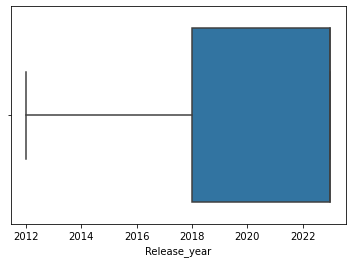

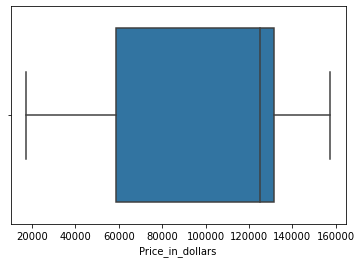

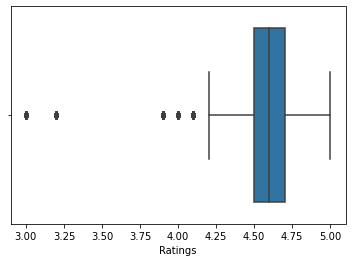

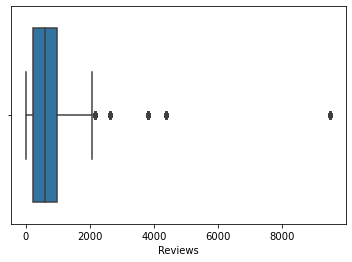

In [506]:
for i in a.columns.tolist():
    sns.boxplot(x=i,data=a)
    plt.show()

## Observation :
   **From the above boxplots we can observe that which cloumns have the outliers.from that we fill the null values with median.**

### Filling the missing values with median those columns have outlier's:

In [501]:
# These are the neumerical  columns of outliers fill with median inplace of missing values
cars_data['Ratings'].fillna(cars_data['Ratings'].median(), inplace = True)
cars_data['Reviews'].fillna(cars_data['Reviews'].median(), inplace = True)

### Filling the missing values with mean those columns haven't outlier's:

In [502]:
# These are the neumerical  columns of without outliers fill with mean inplace of missing values
cars_data['Price_in_dollars'].fillna(cars_data['Price_in_dollars'].mean(), inplace = True)

In [503]:
cars_data

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,66029.0,4.7,35.0,Mercedes-Benz of Centerville
1,Mercedes-Benz,2015,S-Class S 550 4MATIC,34917.0,3.0,40.0,Auto Express
2,Mercedes-Benz,2017,S-Class S 550 4MATIC,56888.0,4.4,90.0,Whitewater Motors Inc.
3,Mercedes-Benz,2019,S-Class S 560 4MATIC,66333.0,4.6,591.0,Mercedes-Benz of Fort Mitchell
4,Mercedes-Benz,2016,S-Class S 550 4MATIC,58590.0,4.0,9508.0,Carvana-Touchless Delivery To Your Home-Des Mo...
...,...,...,...,...,...,...,...
2419,Mercedes-Benz,2022,S-Class S 500 4MATIC,126140.0,4.6,586.0,Mercedes-Benz of Hunt Valley
2420,Mercedes-Benz,2023,S-Class S 580 4MATIC,134610.0,4.6,586.0,Mercedes-Benz of Hunt Valley
2421,Mercedes-Benz,2023,S-Class S 580 4MATIC,125840.0,4.6,586.0,Mercedes-Benz of Hunt Valley
2422,Mercedes-Benz,2023,S-Class S 500 4MATIC,130375.0,4.6,586.0,Mercedes-Benz of Hunt Valley


In [504]:
cars_data.isnull().sum()

Brand               0
Release_year        0
Model_name          0
Price_in_dollars    0
Ratings             0
Reviews             0
Dealer_Name         0
dtype: int64

### Remove the outliers:

In [507]:
# handling outliers:
a=cars_data['Ratings'].quantile(0.25)
print("Q1:",a)# this is Q1.
b=cars_data['Ratings'].quantile(0.75)
print("Q3:",b)# this is Q2.
#now find IQR=Q3-Q1.
IQR=b-a
print("IQR:",IQR)#this is IQR.
c=a-1.5*IQR # this is for < (-veoutlier)
print(c)
d=b+1.5*IQR # this is for > (+veoutlier)
print(d)
k=cars_data['Ratings'][(cars_data['Ratings']<c) | (cars_data['Ratings']>d)]
# print(k)#This is are the outliers
indexes=k.index.tolist()
for index in indexes:
    cars_data.drop(index,inplace=True)

Q1: 4.5
Q3: 4.7
IQR: 0.20000000000000018
4.199999999999999
5.0


In [508]:
# handling outliers:
a=cars_data['Reviews'].quantile(0.25)
print("Q1:",a)# this is Q1.
b=cars_data['Reviews'].quantile(0.75)
print("Q3:",b)# this is Q2.
#now find IQR=Q3-Q1.
IQR=b-a
print("IQR:",IQR)#this is IQR.
c=a-1.5*IQR # this is for < (-veoutlier)
print(c)
d=b+1.5*IQR # this is for > (+veoutlier)
print(d)
k=cars_data['Reviews'][(cars_data['Reviews']<c) | (cars_data['Reviews']>d)]
# print(k)#This is are the outliers
indexes=k.index.tolist()
for index in indexes:
    cars_data.drop(index,inplace=True)

Q1: 285.0
Q3: 973.0
IQR: 688.0
-747.0
2005.0


In [509]:
a=cars_data.select_dtypes(include='number')
a

,Release_year,Price_in_dollars,Ratings,Reviews
0,2019,66029.0,4.7,35.0
2,2017,56888.0,4.4,90.0
3,2019,66333.0,4.6,591.0
5,2015,41591.0,4.3,989.0
6,2023,141060.0,4.3,989.0
...,...,...,...,...
2419,2022,126140.0,4.6,586.0
2420,2023,134610.0,4.6,586.0
2421,2023,125840.0,4.6,586.0
2422,2023,130375.0,4.6,586.0


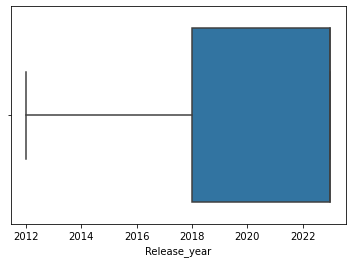

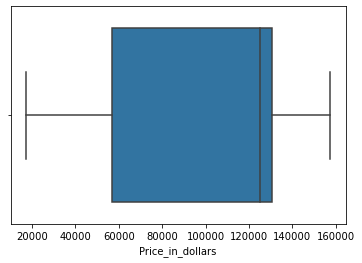

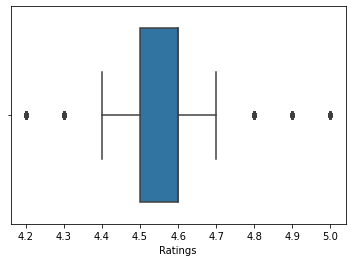

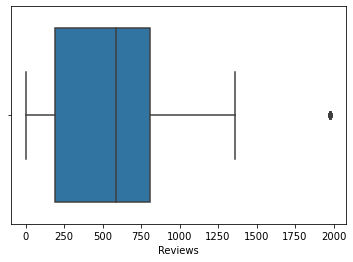

In [510]:
for i in a.columns.tolist():
    sns.boxplot(x=i,data=a)
    plt.show()

### import DataFrame into csv file:

In [527]:
import os
os.getcwd()
cars_data.to_csv('C:\\Users\\Irfan\\Python-innomatics\\cars.csv')


In [2]:
cars_data=pd.read_csv("cars.csv")

In [3]:
cars_data.drop(cars_data.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
cars_data.Reviews=cars_data.Reviews.apply(lambda x:int(x))

In [5]:
cars_data.Price_in_dollars=cars_data.Price_in_dollars.apply(lambda x:int(x))

In [6]:
cars_data

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
0,Mercedes-Benz,2019,S-Class S 560 4MATIC,66029,4.7,35,Mercedes-Benz of Centerville
1,Mercedes-Benz,2017,S-Class S 550 4MATIC,56888,4.4,90,Whitewater Motors Inc.
2,Mercedes-Benz,2019,S-Class S 560 4MATIC,66333,4.6,591,Mercedes-Benz of Fort Mitchell
3,Mercedes-Benz,2015,S-Class S 550 4MATIC,41591,4.3,989,Mercedes-Benz of Louisville
4,Mercedes-Benz,2023,S-Class S 580 4MATIC,141060,4.3,989,Mercedes-Benz of Louisville
...,...,...,...,...,...,...,...
1915,Mercedes-Benz,2022,S-Class S 500 4MATIC,126140,4.6,586,Mercedes-Benz of Hunt Valley
1916,Mercedes-Benz,2023,S-Class S 580 4MATIC,134610,4.6,586,Mercedes-Benz of Hunt Valley
1917,Mercedes-Benz,2023,S-Class S 580 4MATIC,125840,4.6,586,Mercedes-Benz of Hunt Valley
1918,Mercedes-Benz,2023,S-Class S 500 4MATIC,130375,4.6,586,Mercedes-Benz of Hunt Valley


In [7]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1920 non-null   object 
 1   Release_year      1920 non-null   int64  
 2   Model_name        1920 non-null   object 
 3   Price_in_dollars  1920 non-null   int64  
 4   Ratings           1920 non-null   float64
 5   Reviews           1920 non-null   int64  
 6   Dealer_Name       1920 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 105.1+ KB


### Finding the relations between varibales using groupby method....

In [520]:
a=cars_data.groupby('Ratings')
a.first()

,Brand,Release_year,Model_name,Price_in_dollars,Reviews,Dealer_Name
Ratings,,,,,,
4.2,Mercedes-Benz,2014,S-Class S 550,39777,556,Billion Chevrolet Buick GMC of Iowa City
4.3,Mercedes-Benz,2015,S-Class S 550 4MATIC,41591,989,Mercedes-Benz of Louisville
4.4,Mercedes-Benz,2017,S-Class S 550 4MATIC,56888,90,Whitewater Motors Inc.
4.5,Mercedes-Benz,2023,S-Class S 500 4MATIC,126760,64,Mercedes-Benz of Akron
4.6,Mercedes-Benz,2019,S-Class S 560 4MATIC,66333,591,Mercedes-Benz of Fort Mitchell
4.7,Mercedes-Benz,2019,S-Class S 560 4MATIC,66029,35,Mercedes-Benz of Centerville
4.8,Mercedes-Benz,2022,S-Class S 580 4MATIC,129935,576,Mercedes-Benz of St. Charles
4.9,Mercedes-Benz,2018,S-Class S 560 4MATIC,64748,85,Perillo Downers Grove
5.0,Mercedes-Benz,2015,S-Class S 550 4MATIC,38498,359,Bob Lindsay Acura


In [521]:
s=cars_data.groupby(['Model_name'])[['Price_in_dollars']]
s.first()

,Price_in_dollars
Model_name,
S-Class S 450,47900
S-Class S 450 4MATIC,45998
S-Class S 500,124975
S-Class S 500 4MATIC,128485
S-Class S 550,18500
S-Class S 550 4MATIC,56888
S-Class S 560 4MATIC,66029
S-Class S 580 4MATIC,141060
S-Class S 65 AMG,67595


In [522]:
my_sale=cars_data.groupby(['Model_name', 'Dealer_Name'])[['Ratings']].mean().reset_index()
my_sale

,Model_name,Dealer_Name,Ratings
0,S-Class S 450,Randy Marion's Sav-A-Lot,4.6
1,S-Class S 450 4MATIC,Broadway Ashland,4.5
2,S-Class S 450 4MATIC,"Lenz Truck - Fond du Lac, WI",4.5
3,S-Class S 450 4MATIC,Price Pro,4.3
4,S-Class S 500,Mercedes-Benz of Memphis,4.6
5,S-Class S 500 4MATIC,Euro Motorcars Bethesda,4.7
6,S-Class S 500 4MATIC,James Motor Company,4.6
7,S-Class S 500 4MATIC,Mercedes-Benz of Akron,4.5
8,S-Class S 500 4MATIC,Mercedes-Benz of Ann Arbor,4.3
9,S-Class S 500 4MATIC,Mercedes-Benz of Augusta,4.6


### Finding the relation between varibles by using pivot_tables

In [523]:
pd.pivot_table(cars_data,values=['Price_in_dollars'],index=['Model_name'],columns=['Reviews'],fill_value=0)

Price_in_dollars                                         \
Reviews                           2       12      14      17      25     31     
Model_name                                                                      
 S-Class S 450                       0       0       0       0       0      0   
 S-Class S 450 4MATIC                0       0       0       0       0      0   
 S-Class S 500                       0       0       0  124975       0      0   
 S-Class S 500 4MATIC                0  131600  124460       0       0      0   
 S-Class S 550                       0   18500   41877       0       0      0   
 S-Class S 550 4MATIC                0       0       0       0       0      0   
 S-Class S 560 4MATIC                0       0       0       0       0      0   
 S-Class S 580 4MATIC           135285       0  140325       0  117871  98930   
 S-Class S 65 AMG                    0       0       0       0       0      0   

                                                    ...                 \
Reviews                 32     35      64     77    ...           780    
Model_name                                          ...                  
 S-Class S 450         47900      0       0      0  ...       0.000000   
 S-Class S 450 4MATIC      0      0       0      0  ...       0.000000   
 S-Class S 500             0      0       0      0  ...       0.000000   
 S-Class S 500 4MATIC      0      0  126760      0  ...  128848.333333   
 S-Class S 550             0      0       0      0  ...       0.000000   
 S-Class S 550 4MATIC      0      0       0  37990  ...       0.000000   
 S-Class S 560 4MATIC      0  61410       0      0  ...       0.000000   
 S-Class S 580 4MATIC      0      0       0      0  ...  142067.500000   
 S-Class S 65 AMG          0      0       0      0  ...       0.000000   

                                                                               \
Reviews                    894     929     932            973     989    1142   
Model_name                                                                      
 S-Class S 450              0.0       0       0       0.000000       0      0   
 S-Class S 450 4MATIC       0.0       0       0       0.000000       0      0   
 S-Class S 500              0.0       0       0       0.000000       0      0   
 S-Class S 500 4MATIC  125632.5       0  127690  133511.666667       0      0   
 S-Class S 550              0.0       0       0       0.000000       0      0   
 S-Class S 550 4MATIC       0.0       0       0       0.000000   41591      0   
 S-Class S 560 4MATIC       0.0       0       0       0.000000       0      0   
 S-Class S 580 4MATIC  146090.0  153535  133085  139280.000000  141060      0   
 S-Class S 65 AMG           0.0       0       0       0.000000       0  67595   

                                              
Reviews                  1149   1358    1979  
Model_name                                    
 S-Class S 450              0      0       0  
 S-Class S 450 4MATIC       0  51991       0  
 S-Class S 500              0      0       0  
 S-Class S 500 4MATIC       0      0       0  
 S-Class S 550              0      0       0  
 S-Class S 550 4MATIC       0      0       0  
 S-Class S 560 4MATIC       0      0       0  
 S-Class S 580 4MATIC  148510      0  139380  
 S-Class S 65 AMG           0      0       0  

[9 rows x 41 columns]

In [524]:
pd.pivot_table(cars_data,values=['Reviews'],index=['Model_name'],columns=['Release_year'],fill_value=0,aggfunc=np.sum)

Reviews                                            \
Release_year             2012   2013   2014   2015   2016   2017   2018   
Model_name                                                                
 S-Class S 450              0      0      0      0      0      0    768   
 S-Class S 450 4MATIC       0      0      0      0      0      0  63864   
 S-Class S 500              0      0      0      0      0      0      0   
 S-Class S 500 4MATIC       0      0      0      0      0      0      0   
 S-Class S 550              0  14352  13344    336  20904   5064      0   
 S-Class S 550 4MATIC   14064      0      0  49080  11112  19848      0   
 S-Class S 560 4MATIC       0      0      0      0      0      0   2880   
 S-Class S 580 4MATIC       0      0      0      0      0      0      0   
 S-Class S 65 AMG           0      0      0  27408      0      0      0   

                                                   
Release_year            2019 2021    2022    2023  
Model_name                                         
 S-Class S 450             0    0       0       0  
 S-Class S 450 4MATIC      0    0       0       0  
 S-Class S 500             0    0       0     408  
 S-Class S 500 4MATIC      0    0   28128  388080  
 S-Class S 550             0    0       0       0  
 S-Class S 550 4MATIC      0    0       0       0  
 S-Class S 560 4MATIC  15024    0       0       0  
 S-Class S 580 4MATIC      0  744  173592  183936  
 S-Class S 65 AMG          0    0       0       0

In [8]:
cars_data.describe()

,Release_year,Price_in_dollars,Ratings,Reviews
count,1920.000000,1920.000000,1920.00000,1920.000000
mean,2020.712500,103743.962500,4.56125,537.987500
std,3.241962,41213.670488,0.17070,383.154374
min,2012.000000,17300.000000,4.20000,2.000000
25%,2018.000000,56863.750000,4.50000,194.000000
50%,2023.000000,125230.000000,4.60000,586.000000
75%,2023.000000,130771.250000,4.60000,808.500000
max,2023.000000,157390.000000,5.00000,1979.000000


In [9]:
cars_data[(cars_data['Release_year']>=2022) & (cars_data['Price_in_dollars']>=37000) & 
          (cars_data['Price_in_dollars']<=120000)&(cars_data['Ratings']>=4.6)].head(10)

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
61,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
64,Mercedes-Benz,2022,S-Class S 580 4MATIC,117871,4.6,25,Taylor BMW
141,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
144,Mercedes-Benz,2022,S-Class S 580 4MATIC,117871,4.6,25,Taylor BMW
221,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
224,Mercedes-Benz,2022,S-Class S 580 4MATIC,117871,4.6,25,Taylor BMW
301,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
304,Mercedes-Benz,2022,S-Class S 580 4MATIC,117871,4.6,25,Taylor BMW
381,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
384,Mercedes-Benz,2022,S-Class S 580 4MATIC,117871,4.6,25,Taylor BMW


In [27]:
x=int(input("Please Enter for Which Release_year you are looking for: "))
y=int(input("Please Enter for Which Minimum price  you are looking for:"))
z=int(input("Please Enter for Which Maximum price  you are looking for:"))
b=float(input("Please Enter for Which Ratings  you are looking for:"))

Please Enter for Which Release_year you are looking for: 2022
Please Enter for Which Minimum price  you are looking for:104028
Please Enter for Which Maximum price  you are looking for:117871
Please Enter for Which Ratings  you are looking for:4.7


In [28]:
cars_data[(cars_data['Release_year']>=x) & (cars_data['Price_in_dollars']>=y) & (cars_data['Price_in_dollars']<=z) &
          (cars_data['Ratings']>=b)].head(10)

,Brand,Release_year,Model_name,Price_in_dollars,Ratings,Reviews,Dealer_Name
61,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
141,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
221,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
301,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
381,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
461,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
541,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
621,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
701,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
781,Mercedes-Benz,2022,S-Class S 580 4MATIC,104028,4.7,595,Euro Motorcars Bethesda
